<a href="https://colab.research.google.com/github/Saranya003/ML-Projects/blob/main/Customer_Conversion_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement

You are working for a new-age insurance company and employ mutiple outreach plans to sell term insurance to your customers. Telephonic marketing campaigns still remain one of the most effective way to reach out to people however they incur a lot of cost. Hence, it is important to identify the customers that are most likely to convert beforehand so that they can be specifically targeted via call. We are given the historical marketing data of the insurance company and are required to build a ML model that will predict if a client will subscribe to the insurance. 


**Data**

The historical sales data is available as a compressed file here.
https://drive.google.com/file/d/1BJ_Q8Q-kDRisAQyLltBQggeb0QmdWGZy/view?usp=sharing

**Features:** 

●	age (numeric)

●	job : type of job

●	marital : marital status

●	educational_qual : education status

●	call_type : contact communication type

●	day: last contact day of the month (numeric)

●	mon: last contact month of year

●	dur: last contact duration, in seconds (numeric)

●	num_calls: number of contacts performed during this campaign and for this 
client 

●	prev_outcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

**Output variable (desired target):**

●	y - has the client subscribed to the insurance?



# Index:



1.   Importing important packages
2.   Reading the dataset
3. Data Preprocessing- Handling Missing values
4. Outlier detection
4. EDA and Encoding data
6. Sampling and Splitting the dataset into the Training set and Test set
7. Feature Scaling
8. Fitting Logistic Regression to the Training set
9. Prediction using Logistic Regression
10. Evaluation of logistic regression
11. Fitting KNN to the Training set
12. Prediction using KNN
13. Evaluation of KNN
14. Fitting SVM to the Training set
15. Prediction using SVM
16. Evaluation of SVM
17. Fitting Decision Tree Classification to the Training set
18. Prediction using Decision Tree classifier
19. Evaluation of Decision Tree classifier
20. Fitting Random Forest to the Training set
21. Prediction using Random Forest
22. Evaluation of Random Forest
23. Fitting XGBoosting to the Training set
24. Prediction using XGBoost
25. Evaluation of XGBoost
26. Best Classification Algorithm for predicting the given dataset

# Importing important packages

In [ ]:
#importing important packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Reading the dataset

In [ ]:
#reading the dataset
df=pd.read_csv("train.csv")
df

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,cellular,17,nov,977,3,unknown,yes
45207,71,retired,divorced,primary,cellular,17,nov,456,2,unknown,yes
45208,72,retired,married,secondary,cellular,17,nov,1127,5,success,yes
45209,57,blue-collar,married,secondary,telephone,17,nov,508,4,unknown,no


In [ ]:
df.shape

(45211, 11)

# Data Preprocessing- Handling Missing values

In [ ]:
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

In [ ]:
df['job'].replace('unknown', np.nan, inplace=True)
df['education_qual'].replace('unknown', np.nan, inplace=True)

In [ ]:
df

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,NaN,unknown,5,may,92,1,unknown,no
4,33,NaN,single,NaN,unknown,5,may,198,1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,cellular,17,nov,977,3,unknown,yes
45207,71,retired,divorced,primary,cellular,17,nov,456,2,unknown,yes
45208,72,retired,married,secondary,cellular,17,nov,1127,5,success,yes
45209,57,blue-collar,married,secondary,telephone,17,nov,508,4,unknown,no


In [ ]:
df.isnull().sum()

age                  0
job                288
marital              0
education_qual    1857
call_type            0
day                  0
mon                  0
dur                  0
num_calls            0
prev_outcome         0
y                    0
dtype: int64

call_type and prev_outcome have 30 percentage greater or equal unknown value. Therefore, we consider unknown as a category in both call_type and prev_outcome for prediction. We don't need modify both columns in our data frame.

In [ ]:
df.dtypes

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                 object
dtype: object

In [ ]:
df['job'].fillna('blue-collar', inplace=True)#df.job.mode()='blue-collar'  i.e. most frequent data
df['education_qual'].fillna('secondary', inplace=True)#df.education_qual.mode()='secondary' i.e. most frequent data
df

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,secondary,unknown,5,may,92,1,unknown,no
4,33,blue-collar,single,secondary,unknown,5,may,198,1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,cellular,17,nov,977,3,unknown,yes
45207,71,retired,divorced,primary,cellular,17,nov,456,2,unknown,yes
45208,72,retired,married,secondary,cellular,17,nov,1127,5,success,yes
45209,57,blue-collar,married,secondary,telephone,17,nov,508,4,unknown,no


In [ ]:
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

# Outlier detection

In [ ]:
df.describe()

,age,day,dur,num_calls
count,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,15.806419,258.163080,2.763841
std,10.618762,8.322476,257.527812,3.098021
min,18.000000,1.000000,0.000000,1.000000
25%,33.000000,8.000000,103.000000,1.000000
50%,39.000000,16.000000,180.000000,2.000000
75%,48.000000,21.000000,319.000000,3.000000
max,95.000000,31.000000,4918.000000,63.000000


In [ ]:
out_col=['age','day','dur','num_calls']
for col in out_col:
  iqr = df[col].quantile(0.75) - df[col].quantile(0.25)
  upper_threshold = df[col].quantile(0.75) + (1.5 * iqr)
  lower_threshold = df[col].quantile(0.25) - (1.5 * iqr)
  print("column name:", col)
  print('       upper threshold value:', upper_threshold)
  print('       lower threshold value:', lower_threshold)
  flag=0
  for i in range(1,8):
    if ((df[col].describe()[i]>=lower_threshold) and (df[col].describe()[i]<=upper_threshold)):
      pass
    else:
      flag=1
      break
  if flag==1:
    print(col, '=> Outlier Detected')
    print("outlier value: ",df[col].describe()[i],"row at which outlier occured: ",i)
  else:
    print(col, '=> Outlier Not Detected')

column name: age
       upper threshold value: 70.5
       lower threshold value: 10.5
age => Outlier Detected
outlier value:  95.0 row at which outlier occured:  7
column name: day
       upper threshold value: 40.5
       lower threshold value: -11.5
day => Outlier Not Detected
column name: dur
       upper threshold value: 643.0
       lower threshold value: -221.0
dur => Outlier Detected
outlier value:  4918.0 row at which outlier occured:  7
column name: num_calls
       upper threshold value: 6.0
       lower threshold value: -2.0
num_calls => Outlier Detected
outlier value:  63.0 row at which outlier occured:  7


Age of a person could be 95. Therefore, we won't clip the age value.
we do the cliping for both dur and num_calls

In [ ]:
df.dur = df.dur.clip(-221,643)
df.num_calls = df.num_calls.clip(-2,6)

In [ ]:
df.describe()

,age,day,dur,num_calls
count,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,15.806419,234.939307,2.392228
std,10.618762,8.322476,176.749932,1.600111
min,18.000000,1.000000,0.000000,1.000000
25%,33.000000,8.000000,103.000000,1.000000
50%,39.000000,16.000000,180.000000,2.000000
75%,48.000000,21.000000,319.000000,3.000000
max,95.000000,31.000000,643.000000,6.000000


# EDA and Encoding data

In [ ]:
df.y.value_counts()
df["y"] = df["y"].map({"yes" : 1, "no" : 0})

In [ ]:
df.groupby("prev_outcome")["y"].mean()

prev_outcome
failure    0.126097
other      0.166848
success    0.647253
unknown    0.091615
Name: y, dtype: float64

<AxesSubplot:ylabel='job'>

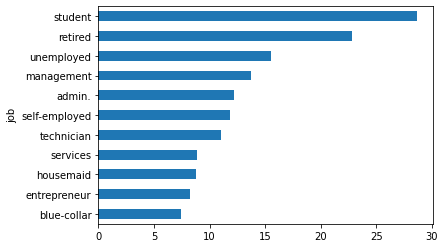

In [ ]:
(df.groupby('job')['y'].mean()*100).sort_values().plot(kind="barh")

In [ ]:
df.job.value_counts()

blue-collar      10020
management        9458
technician        7597
admin.            5171
services          4154
retired           2264
self-employed     1579
entrepreneur      1487
unemployed        1303
housemaid         1240
student            938
Name: job, dtype: int64

In [ ]:
#encode the job using lable encoding based on the mean segregation of data
df["job"] = df["job"].map({"blue-collar" : 0, "entrepreneur" : 1,"housemaid" : 2,"services" : 3, "technician" : 4,"self-employed" : 5,"admin." : 6, "management" : 7,"unemployed" : 8,"retired" : 9, "student" : 10})

<AxesSubplot:ylabel='marital'>

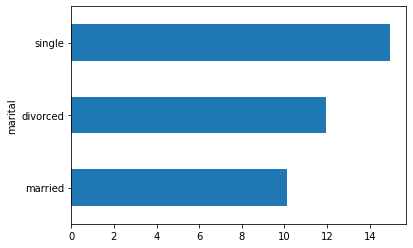

In [ ]:
(df.groupby("marital")['y'].mean()*100).sort_values().plot(kind="barh")

In [ ]:
df.marital.value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [ ]:
#encode the marital using lable encoding based on the mean segregation of data
df["marital"] = df["marital"].map({"married" : 0, "divorced" : 1,"single" : 2})

<AxesSubplot:ylabel='education_qual'>

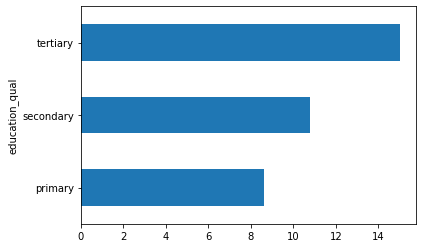

In [ ]:
(df.groupby("education_qual")['y'].mean()*100).sort_values().plot(kind="barh")

In [ ]:
df.education_qual.value_counts()

secondary    25059
tertiary     13301
primary       6851
Name: education_qual, dtype: int64

In [ ]:
df["education_qual"] = df["education_qual"].map({"primary" : 0, "secondary" : 1,"tertiary" : 2})

<AxesSubplot:ylabel='call_type'>

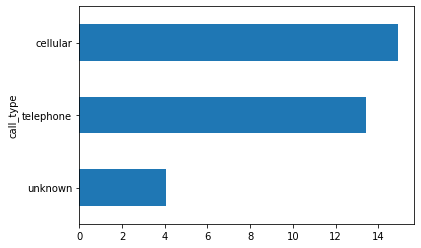

In [ ]:
(df.groupby("call_type")['y'].mean()*100).sort_values().plot(kind="barh")

In [ ]:
df.call_type.value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: call_type, dtype: int64

In [ ]:
#encode the call_type using lable encoding based on the mean segregation of data
df["call_type"] = df["call_type"].map({"unknown" : 0, "telephone" : 1,"cellular" : 2})

<AxesSubplot:ylabel='mon'>

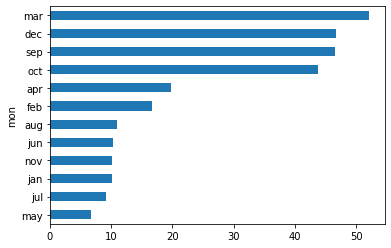

In [ ]:
(df.groupby("mon")['y'].mean()*100).sort_values().plot(kind="barh")

In [ ]:
df.mon.value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: mon, dtype: int64

In [ ]:
#encode the mon using lable encoding based on the mean segregation of data
df["mon"] = df["mon"].map({"may" : 0, "jul" : 1,"jan" : 2,"nov" : 3, "jun" : 4,"aug" : 5,"feb" : 6, "apr" : 7,"oct" : 8,"sep" : 9, "dec" : 10,"mar" : 11})

<AxesSubplot:ylabel='prev_outcome'>

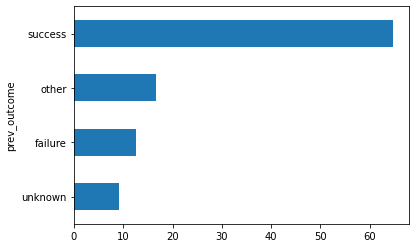

In [ ]:
(df.groupby("prev_outcome")['y'].mean()*100).sort_values().plot(kind="barh")

In [ ]:
df.prev_outcome.value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: prev_outcome, dtype: int64

In [ ]:
#encode the prev_outcome using lable encoding based on the mean segregation of data
df["prev_outcome"] = df["prev_outcome"].map({"unknown" : 0, "failure" : 1, "other" : 2, "success" : 3})

In [ ]:
df

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,7,0,2,0,5,0,261,1,0,0
1,44,4,2,1,0,5,0,151,1,0,0
2,33,1,0,1,0,5,0,76,1,0,0
3,47,0,0,1,0,5,0,92,1,0,0
4,33,0,2,1,0,5,0,198,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,4,0,2,2,17,3,643,3,0,1
45207,71,9,1,0,2,17,3,456,2,0,1
45208,72,9,0,1,2,17,3,643,5,3,1
45209,57,0,0,1,1,17,3,508,4,0,0


In [ ]:
df.dtypes

age               int64
job               int64
marital           int64
education_qual    int64
call_type         int64
day               int64
mon               int64
dur               int64
num_calls         int64
prev_outcome      int64
y                 int64
dtype: object

# Sampling and Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop(['y'], axis=1)
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=3) 

In [ ]:
from imblearn.under_sampling import NearMiss
from collections import Counter
undersampling = NearMiss(version=3, n_neighbors=3)
X_train, y_train= undersampling.fit_resample(X_train,y_train)
c=Counter(y_train)
print(c)

Counter({0: 3964, 1: 3964})


# Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler # importing the required function
scaler = StandardScaler() #initialis
scaler.fit(X_train) # find the values of mu and sigma
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test) 

# Fitting Logistic Regression to the Training set

In [ ]:
from sklearn.linear_model import LogisticRegression #main code that build the LR model 
logistic_regression= LogisticRegression() #initialise the required package
logistic_regression.fit(X_train,y_train) 

LogisticRegression()

# Prediction using Logistic Regression

In [ ]:
y_pred=logistic_regression.predict(X_test)
y_pred

array([0, 0, 0, ..., 1, 0, 0])

# Evaluation of logistic regression

In [ ]:
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, confusion_matrix, f1_score
print("The confusion matrix: \n", confusion_matrix(y_test,y_pred))
print("Accuracy : ", logistic_regression.score(X_test,y_test))
print("f1 score : ", f1_score(y_test,y_pred))
print("AUROC score : ", roc_auc_score(y_test,y_pred))
lr_auroc=roc_auc_score(y_test,y_pred)

The confusion matrix: 
 [[8791 1187]
 [ 411  914]]
Accuracy :  0.8586216048836592
f1 score :  0.5335668417980152
AUROC score :  0.7854248024900062


# Fitting KNN to the Training set

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from imblearn.pipeline import Pipeline
from numpy import mean
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import RepeatedStratifiedKFold 
for i in [1,2,3,9,10,20,30,31,32,33,34,35,36,37,38,39,40,50,80]:
  knn = KNeighborsClassifier(i) #initialising the model
  knn.fit(X_train,y_train) # training the model
  pipeline = imbpipeline(steps = [['smote', SMOTE(random_state=11)],['scaler', MinMaxScaler()],['classifier', KNeighborsClassifier(i)]])
  #This process is used to apply unbalanced test data and balaced training data to get 10 fold cross validation score.
  stratified_kfold = StratifiedKFold(n_splits=10,shuffle=True,random_state=11)
  scores = cross_val_score(pipeline, X_train,y_train, scoring='roc_auc', cv=stratified_kfold, n_jobs=-1)
  print("K value  : " , i, " train score : ", knn.score(X_train,y_train) , " cv score : ", mean(scores)) #predicting using the model

K value  :  1  train score :  1.0  cv score :  0.671418530392082
K value  :  2  train score :  0.8280776992936428  cv score :  0.7144174054233401
K value  :  3  train score :  0.8380423814328961  cv score :  0.7368249737792139
K value  :  9  train score :  0.7766145307769929  cv score :  0.7761159760274808
K value  :  10  train score :  0.7645055499495459  cv score :  0.7778108067482448
K value  :  20  train score :  0.749117053481332  cv score :  0.7878536505232463
K value  :  30  train score :  0.7383955600403632  cv score :  0.7907551979929566
K value  :  31  train score :  0.7389001009081736  cv score :  0.7904323870912778
K value  :  32  train score :  0.7367558022199798  cv score :  0.7906992780385079
K value  :  33  train score :  0.7391523713420787  cv score :  0.7901937151326511
K value  :  34  train score :  0.7356205852674067  cv score :  0.7910668220124559
K value  :  35  train score :  0.7348637739656912  cv score :  0.7908188690135203
K value  :  36  train score :  0.7348

Let the K value be 39. Since, it has highest cross validation score and decent train score.

# Prediction using KNN

In [ ]:
knn = KNeighborsClassifier(39)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

# Evaluation of KNN

In [ ]:
print("The confusion matrix: \n", confusion_matrix(y_test,y_pred))
print("Accuracy : ", knn.score(X_test,y_test))
print("f1 score : ", f1_score(y_test,y_pred))
print("AUROC score : ", roc_auc_score(y_test,y_pred))
knn_auroc=roc_auc_score(y_test,y_pred)

The confusion matrix: 
 [[8659 1319]
 [ 410  915]]
Accuracy :  0.8470317614792533
f1 score :  0.5141893790390559
AUROC score :  0.7791876089661406


# Fitting SVM to the Training set

In [ ]:
from sklearn.svm import SVC
# Building a Support Vector Machine on train data
svc_model = SVC(kernel='linear')
svc_model.fit(X_train, y_train)

SVC(kernel='linear')

# Prediction using SVM

In [ ]:
y_pred=svc_model.predict(X_test)
y_pred

array([0, 0, 0, ..., 1, 0, 0])

# Evaluation of SVM

In [ ]:
print("The confusion matrix: \n", confusion_matrix(y_test,y_pred))
print("Accuracy : ", svc_model.score(X_test,y_test))
print("f1 score : ", f1_score(y_test,y_pred))
print("AUROC score : ", roc_auc_score(y_test,y_pred))
svm_auroc=roc_auc_score(y_test,y_pred)

The confusion matrix: 
 [[8761 1217]
 [ 403  922]]
Accuracy :  0.8566752189684155
f1 score :  0.5323325635103926
AUROC score :  0.7869403631385276


# Fitting Decision Tree Classification to the Training set

In [ ]:
from sklearn.tree import DecisionTreeClassifier
for depth in [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,20]:
  dt = DecisionTreeClassifier(max_depth=depth) # will tell the DT to not grow past the given threhsold
  # Fit dt to the training set
  dt.fit(X_train, y_train) # the model is trained
  trainAccuracy = accuracy_score(y_train, dt.predict(X_train)) # this is useless information - i am showing to prove a point
  pipeline = imbpipeline(steps = [['smote', SMOTE(random_state=11)],['scaler', MinMaxScaler()],['classifier', DecisionTreeClassifier(max_depth=depth)]])
  #This process is used to apply unbalanced test data and balaced training data to get 10 fold cross validation score.
  stratified_kfold = StratifiedKFold(n_splits=10,shuffle=True,random_state=11)
  scores = cross_val_score(pipeline, X_train,y_train, scoring='roc_auc', cv=stratified_kfold, n_jobs=-1)
  print("Depth  : ", depth, " Training Accuracy : ", trainAccuracy, " Cross val score : " ,np.mean(scores))

Depth  :  1  Training Accuracy :  0.6570383451059536  Cross val score :  0.6570471719716052
Depth  :  2  Training Accuracy :  0.7257820383451059  Cross val score :  0.7299640402254229
Depth  :  3  Training Accuracy :  0.7523965691220988  Cross val score :  0.7682809669346956
Depth  :  4  Training Accuracy :  0.75441473259334  Cross val score :  0.7982730101051222
Depth  :  5  Training Accuracy :  0.757063572149344  Cross val score :  0.8140050946454084
Depth  :  6  Training Accuracy :  0.7592078708375378  Cross val score :  0.8178783564340965
Depth  :  7  Training Accuracy :  0.7708123107971746  Cross val score :  0.817938251108906
Depth  :  8  Training Accuracy :  0.7800201816347124  Cross val score :  0.8169843760480925
Depth  :  9  Training Accuracy :  0.795534813319879  Cross val score :  0.8149013149778834
Depth  :  10  Training Accuracy :  0.8134460141271443  Cross val score :  0.8087021783876986
Depth  :  11  Training Accuracy :  0.8366548940464178  Cross val score :  0.80287294

Let the max_depth value be 7. Since, it has highest cross validation score and decent train score.

# Prediction using Decision Tree classifier

In [ ]:
dt = DecisionTreeClassifier(max_depth=7)

# Fit dt to the training set
dt.fit(X_train, y_train) # it will ask all possible questions, compute the information gain and choose the best split

# Predict test set labels
y_pred = dt.predict(X_test)
y_pred

array([0, 0, 0, ..., 1, 0, 0])

# Evaluation of Decision Tree classifier

In [ ]:
print("The confusion matrix: \n", confusion_matrix(y_test,y_pred))
print("Accuracy : ", dt.score(X_test,y_test))
print("f1 score : ", f1_score(y_test,y_pred))
print("AUROC score : ", roc_auc_score(y_test,y_pred))
dt_auroc=roc_auc_score(y_test,y_pred)

The confusion matrix: 
 [[9193  785]
 [ 523  802]]
Accuracy :  0.884278510130054
f1 score :  0.5508241758241759
AUROC score :  0.7633049690451068


# Fitting Random Forest to the Training set

In [ ]:
from sklearn.ensemble import RandomForestClassifier
for depth in [1,2,3,7,8,9,10,11,12,13,14,15,16,17,18,19,20,25,30]:
  rf = RandomForestClassifier(max_depth=depth) # will tell the rf to not grow past the given threhsold
  # Fit rf to the training set
  rf.fit(X_train, y_train) # the model is trained
  trainAccuracy = accuracy_score(y_train, rf.predict(X_train)) # this is useless information - i am showing to prove a point
  pipeline = imbpipeline(steps = [['smote', SMOTE(random_state=11)],['scaler', MinMaxScaler()],['classifier', RandomForestClassifier(max_depth=depth)]])
  #This process is used to apply unbalanced test data and balaced training data to get 10 fold cross validation score.
  stratified_kfold = StratifiedKFold(n_splits=10,shuffle=True,random_state=11)
  scores = cross_val_score(pipeline, X_train,y_train, scoring='roc_auc', cv=stratified_kfold, n_jobs=-1)
  print("Depth  : ", depth, " Training Accuracy : ", trainAccuracy, " Cross val score : " ,np.mean(scores))

Depth  :  1  Training Accuracy :  0.7502522704339052  Cross val score :  0.8223979773050454
Depth  :  2  Training Accuracy :  0.7525227043390514  Cross val score :  0.8252917022295314
Depth  :  3  Training Accuracy :  0.7527749747729566  Cross val score :  0.8292606480421341
Depth  :  7  Training Accuracy :  0.773335015136226  Cross val score :  0.8493153457841268
Depth  :  8  Training Accuracy :  0.7859485368314834  Cross val score :  0.8543521621836255
Depth  :  9  Training Accuracy :  0.8027245206861756  Cross val score :  0.8592941780088754
Depth  :  10  Training Accuracy :  0.8302219979818365  Cross val score :  0.8620805477362229
Depth  :  11  Training Accuracy :  0.8540615539858728  Cross val score :  0.8646910242413449
Depth  :  12  Training Accuracy :  0.8831987891019173  Cross val score :  0.8667478701474198
Depth  :  13  Training Accuracy :  0.9103178607467205  Cross val score :  0.8672151941391885
Depth  :  14  Training Accuracy :  0.9283551967709385  Cross val score :  0.8

Let the max_depth value be 14. Since, it has highest cross validation score and decent train score.

# Prediction using Random Forest

In [ ]:
rf = RandomForestClassifier(max_depth=14)
rf.fit(X_train, y_train)
# Predict test set labels
y_pred = rf.predict(X_test)
y_pred

array([0, 0, 0, ..., 1, 0, 0])

# Evaluation of Random Forest

In [ ]:
print("The confusion matrix: \n", confusion_matrix(y_test,y_pred))
print("Accuracy : ", rf.score(X_test,y_test))
print("f1 score : ", f1_score(y_test,y_pred))
print("AUROC score : ", roc_auc_score(y_test,y_pred))
rf_auroc=roc_auc_score(y_test,y_pred)

The confusion matrix: 
 [[8943 1035]
 [ 375  950]]
Accuracy :  0.8752543572502876
f1 score :  0.5740181268882175
AUROC score :  0.8066264650154868


# Fitting XGBoosting to the Training set

In [ ]:
from xgboost import XGBClassifier
for lr in [0.01,0.02,0.03,0.04,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.2,0.3,0.4,0.5,0.7,1]:
  model = XGBClassifier(learning_rate = lr, n_estimators=100, verbosity = 0) # initialise the model
  model.fit(X_train,y_train) #train the model
  model.score(X_test, y_test) # scoring the model 
  print("Learning rate : ", lr, " Train score : ", model.score(X_train,y_train), " Cross-Val score : ", np.mean(cross_val_score(model, X_train, y_train, cv=10)))

Learning rate :  0.01  Train score :  0.7619828456104945  Cross-Val score :  0.7477326862572764
Learning rate :  0.02  Train score :  0.7856962663975782  Cross-Val score :  0.7642554167144332
Learning rate :  0.03  Train score :  0.8009586276488395  Cross-Val score :  0.7706882825735285
Learning rate :  0.04  Train score :  0.8096619576185671  Cross-Val score :  0.7703088578088578
Learning rate :  0.09  Train score :  0.8562058526740666  Cross-Val score :  0.783930254626976
Learning rate :  0.1  Train score :  0.8579717457114027  Cross-Val score :  0.7838063803227738
Learning rate :  0.11  Train score :  0.8647830474268415  Cross-Val score :  0.7858251493497395
Learning rate :  0.12  Train score :  0.8717204843592331  Cross-Val score :  0.7864559848166406
Learning rate :  0.13  Train score :  0.8806760847628657  Cross-Val score :  0.7839331206134484
Learning rate :  0.14  Train score :  0.8816851664984864  Cross-Val score :  0.7856979313946527
Learning rate :  0.15  Train score :  0.89

Let the Learning rate value be 0.15. Since, it has highest cross validation score and decent train score.

# Prediction using XGBoost

In [ ]:
xgb = XGBClassifier(learning_rate = 0.15, n_estimators=100)
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
y_pred

array([0, 0, 0, ..., 1, 0, 0])

# Evaluation of XGBoost

In [ ]:
print("The confusion matrix: \n", confusion_matrix(y_test,y_pred))
print("Accuracy : ", xgb.score(X_test,y_test))
print("f1 score : ", f1_score(y_test,y_pred))
print("AUROC score : ", roc_auc_score(y_test,y_pred))
xgb_auroc=roc_auc_score(y_test,y_pred)

The confusion matrix: 
 [[8875 1103]
 [ 316 1009]]
Accuracy :  0.8744581084667787
f1 score :  0.587139947628746
AUROC score :  0.8254831194666


# Best Classification Algorithm for predicting the given dataset

In [ ]:
df_results = pd.DataFrame({'classifier':['LR','KNN','SVM','DT','RF','XGBC'],
                          'auc':[lr_auroc,knn_auroc,svm_auroc,dt_auroc,rf_auroc,xgb_auroc]})

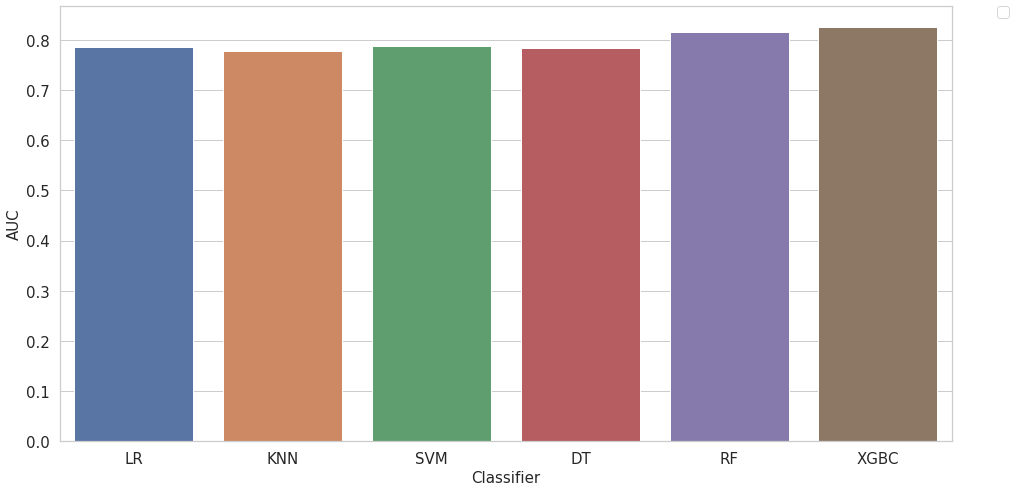

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="whitegrid")
sns.set_style("whitegrid")
plt.figure(figsize=(16, 8))
ax = sns.barplot(x = 'classifier', y = 'auc', data = df_results)
ax.set_xlabel('Classifier', fontsize = 15)
ax.set_ylabel('AUC', fontsize = 15)
ax.tick_params(labelsize = 15)

#Separate legend from graph
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0., fontsize = 15)

# **According to the above analysis XGBC gave the best prediction performance compared to other classifers.**

In [ ]:
original_feature_list = list(df.columns)
# Get numerical feature importances
importances = list(xgb.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(original_feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: prev_outcome         Importance: 0.33000001311302185
Variable: call_type            Importance: 0.18000000715255737
Variable: dur                  Importance: 0.15000000596046448
Variable: mon                  Importance: 0.09000000357627869
Variable: day                  Importance: 0.05000000074505806
Variable: num_calls            Importance: 0.05000000074505806
Variable: age                  Importance: 0.03999999910593033
Variable: marital              Importance: 0.03999999910593033
Variable: education_qual       Importance: 0.03999999910593033
Variable: job                  Importance: 0.029999999329447746


**The important features that is useful to predict are prev_outcome, call_type, dur, mon, day and num_calls according to the above data.**